In [36]:
import pandas as pd
import geopandas as gpd
from plotnine import (
    ggplot,
    aes,
    geom_map,
    labs,
    scale_fill_continuous,
    element_rect,
    element_text,
    theme,
    theme_538
)

In [81]:
roughness = pd.read_csv("data/Roughness.csv")
roughness["roughness"] = roughness.surfaceArea / roughness.area
roughness["increaseRank"] = roughness["roughness"].rank(ascending=False)
roughness["planarRank"] = roughness["area"].rank(ascending=False)
roughness["surfaceRank"] = roughness["surfaceArea"].rank(ascending=False)
roughness["rankDifference"] = roughness.planarRank - roughness.surfaceRank

In [82]:
countries = gpd.read_file("data/geoBoundariesCGAZ_ADM0.gpkg").merge(roughness, on="shapeGroup").query("shapeType=='ADM0'")

In [83]:
selector_d = {"increaseRank": "Rank", "shapeName": "Country", "area": "Planar Area (km²)", "surfaceArea": "Surface Area (km²)", "roughness": "Percent increase"}
display_df = countries.rename(columns=selector_d)[[*selector_d.values()]]
display_df["Planar Area (km²)"] = display_df["Planar Area (km²)"].map('{:,.0f}'.format)
display_df["Surface Area (km²)"] = display_df["Surface Area (km²)"].map('{:,.0f}'.format)
display_df["Percent increase"] = (display_df["Percent increase"]-1).map('{:.2%}'.format)
display_df

,Rank,Country,Planar Area (km²),Surface Area (km²),Percent increase
0,30.0,Afghanistan,"641,816","683,784",6.54%
1,125.0,United Kingdom,"251,979","255,794",1.51%
2,18.0,Albania,"28,679","30,965",7.97%
3,161.0,Algeria,"2,306,122","2,320,364",0.62%
4,108.0,United States,"9,483,866","9,674,974",2.02%
...,...,...,...,...,...
192,35.0,Burma,"667,100","707,586",6.07%
193,92.0,India,"3,150,159","3,232,289",2.61%
194,195.0,Benin,"115,292","115,463",0.15%
195,192.0,Niger,"1,180,868","1,183,114",0.19%


In [91]:
print(display_df.sort_values("Rank", ascending=True).drop("Rank",axis=1).to_markdown(index=False))

| Country                     | Planar Area (km²)   | Surface Area (km²)   | Percent increase   |
|:----------------------------|:--------------------|:---------------------|:-------------------|
| Bhutan                      | 38,585              | 45,685               | 18.40%             |
| Nepal                       | 147,578             | 170,573              | 15.58%             |
| Andorra                     | 464                 | 535                  | 15.29%             |
| Liechtenstein               | 160                 | 182                  | 13.94%             |
| Tajikistan                  | 141,299             | 160,619              | 13.67%             |
| Taiwan                      | 36,325              | 40,671               | 11.96%             |
| Georgia                     | 45,627              | 50,916               | 11.59%             |
| Switzerland                 | 41,287              | 45,971               | 11.34%             |
| Kyrgyzstan        

In [ ]:
print(display_df.sort_values("Rank", ascending=False).drop("Rank",axis=1).head(20).to_markdown(index=False))

| Country       | Planar Area (km²)   | Surface Area (km²)   | Percent increase   |
|:--------------|:--------------------|:---------------------|:-------------------|
| Kuwait        | 17,364              | 17,368               | 0.02%              |
| Botswana      | 578,160             | 578,338              | 0.03%              |
| Qatar         | 11,653              | 11,657               | 0.04%              |
| Tuvalu        | 29                  | 29                   | 0.05%              |
| Kiribati      | 925                 | 925                  | 0.05%              |
| Bahamas, The  | 12,454              | 12,461               | 0.05%              |
| Maldives      | 161                 | 161                  | 0.05%              |
| Senegal       | 196,296             | 196,431              | 0.07%              |
| Burkina Faso  | 273,354             | 273,554              | 0.07%              |
| Marshall Is   | 128                 | 128                  | 0.07%        

/home/jonas/Documents/Projects/2024/RoughCountries/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 12 x 10 in image.
/home/jonas/Documents/Projects/2024/RoughCountries/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: rough_countries.png


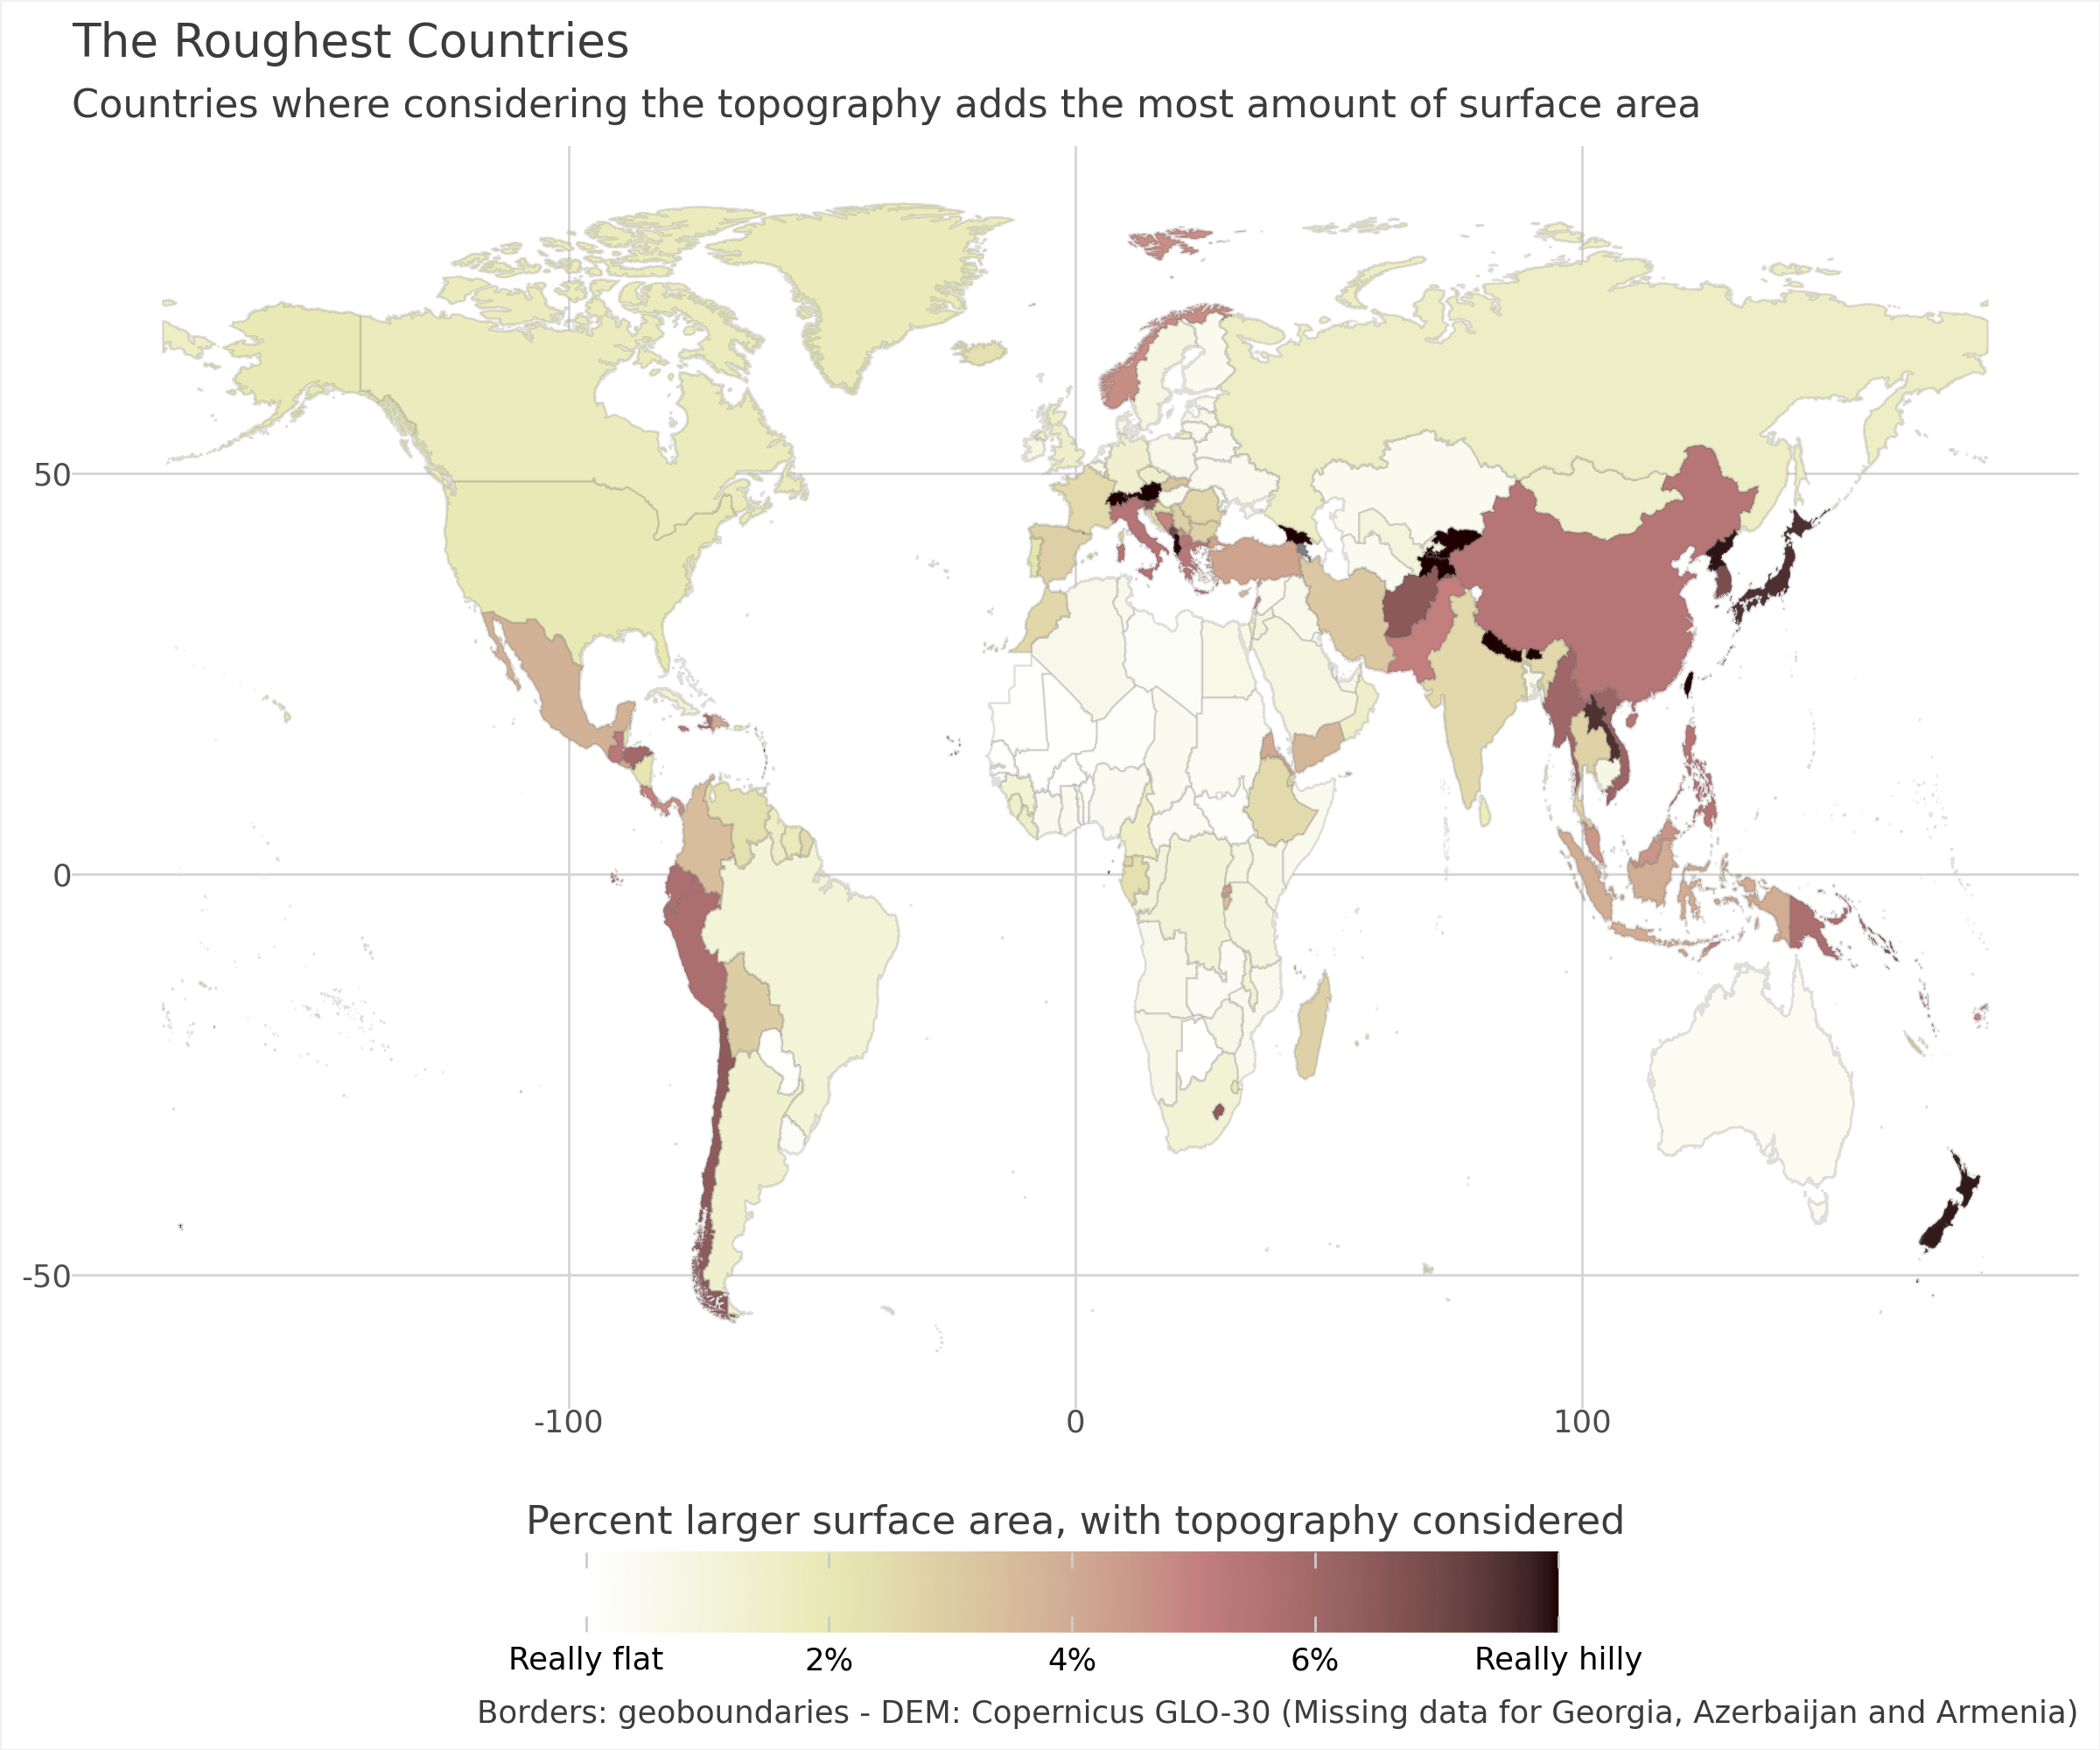

In [41]:
background_color = "#ffffff"

fig = (
    ggplot(countries)
    + geom_map(aes(fill="roughness"), color="#66666633")
    + scale_fill_continuous(
        name="Percent larger surface area, with topography considered",
        cmap_name="pink_r",#
        limits=[1, 1.08],
        labels=lambda ticks: ["Really flat"] + [f"{(tick-1)*100:.0f}%" for tick in ticks[1:-1]] + ["Really hilly"]
    )
    + theme_538(base_size=16)
    + theme(
        figure_size=(12, 10),
        legend_position="bottom",
        legend_direction="horizontal",
        legend_title_position="top",
        legend_key_width=400,
        plot_background=element_rect(background_color),
        panel_background=element_rect(background_color),
    )
    + labs(
        title="The Roughest Countries",
        subtitle="Countries where considering the topography adds the most amount of surface area",
        caption="Borders: geoboundaries - DEM: Copernicus GLO-30 (Missing data for Georgia, Azerbaijan and Armenia)"
    )
)

fig.save('rough_countries.png', dpi=72)
fig